# Griddap

Erddapy can access gridded datasets, using the server-side subsetting of griddap to download only the parts of a gridded dataset that the user requires

In [1]:
import sys
sys.path.insert(0, '/media/callum/storage/Documents/gsoc/erddapy')
from erddapy import ERDDAP

When accessing gridded datasets, the kwarg `protocol='griddap'` must be used

In [2]:
e = ERDDAP(
    server="CSWC", # "NOAA IOOS NGDAC (National Glider Data Assembly Center)"
    protocol="griddap",
    response='csvp'
)
e.dataset_id = "ucsdHfrE1"


#e.constraints['bootn'] = 100
#e.variables = ['foo', 'water_u', 'baz', 'hdop']
#e.griddap_initialise()
#foo = e.to_xarray()

Information on the griddap dataset is fetched with `griddap_initialize`. This fills the `variables` and `constraints` properties with the erddap defaults

In [3]:
e.griddap_initialize()

import json
print(f"variables in this dataset:\n\n{e.variables}")
print(f"\nconstraints of this dataset:\n\n{json.dumps(e.constraints, indent=1)}")

variables in this dataset:

['water_u', 'water_v', 'DOPx', 'DOPy', 'hdop', 'number_of_sites', 'number_of_radials']

constraints of this dataset:

{
 "time>=": "2021-06-30T13:00:00Z",
 "time<=": "2021-06-30T13:00:00Z",
 "time_step": 1,
 "latitude>=": 21.7,
 "latitude<=": 46.49442,
 "latitude_step": 1,
 "longitude>=": -97.88385,
 "longitude<=": -57.192493,
 "longitude_step": 1
}


The default behaviour is to use erddap standard subsetting: return all variables at the most recent timestep and every point of the remaining dimensions.

This can result in large datasets, the values of the constraints can be changed, and variables dropped before data ser downloaded

In [4]:
e.variables = e.variables[:2]
print(f"variables for download:\n\n{e.variables}")

variables for download:

['water_u', 'water_v']


In [5]:
e.constraints['latitude>='] = 45
e.constraints['longitude>='] = -58
e.constraints['latitude_step'] = 5
print(f"\nconstraints for download:\n\n{json.dumps(e.constraints, indent=1)}")


constraints for download:

{
 "time>=": "2021-06-30T13:00:00Z",
 "time<=": "2021-06-30T13:00:00Z",
 "time_step": 1,
 "latitude>=": 45,
 "latitude<=": 46.49442,
 "latitude_step": 5,
 "longitude>=": -58,
 "longitude<=": -57.192493,
 "longitude_step": 1
}


Once the query is prepared, data can be downloaded using the same methods as tabledap

In [6]:
ds = e.to_xarray()

In [7]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 34, longitude: 84, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2021-06-30T13:00:00
  * latitude   (latitude) float32 45.0 45.05 45.09 45.14 ... 46.4 46.44 46.49
  * longitude  (longitude) float32 -58.0 -57.99 -57.98 ... -57.21 -57.2 -57.19
Data variables:
    water_u    (time, latitude, longitude) float32 ...
    water_v    (time, latitude, longitude) float32 ...
Attributes: (12/45)
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_email:              hfrnet.administrators@sio.ucsd.edu
    creator_name:               HFRNet Administrators
    creator_type:               group
    ...                         ...
    summary:                    Surface ocean velocities estimated from HF-Ra...
    testOutOfDate:              now-1day
    time_coverage_end:          2021-06-30T13:00:00Z
    time_coverage_start:        2021-06-30T13:00:00Z
    title:                      Currents, HF Radar, US East Coast and Gulf of...
    Westernmost_Easting:        -57.995865

In [8]:
import matplotlib

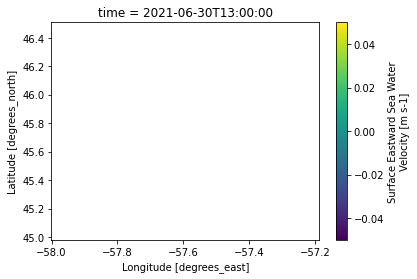

In [9]:
ds.water_u.plot()

In [10]:
print(e.get_download_url())

https://coastwatch.pfeg.noaa.gov/erddap/griddap/ucsdHfrE1.csvp?water_u[(2021-06-30T13:00:00Z):1:(2021-06-30T13:00:00Z)][(45):5:(46.49442)][(-58):1:(-57.192493)],water_v[(2021-06-30T13:00:00Z):1:(2021-06-30T13:00:00Z)][(45):5:(46.49442)][(-58):1:(-57.192493)]
